In [5]:
import tensorflow as tf
from tensorflow.python.client import device_lib
import os

In [2]:
# Stop out of memory error
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [6]:
import numpy as np
from matplotlib import pyplot as plt

In [4]:
os.listdir()

['code',
 'data',
 'logs',
 'models',
 'new_test_data',
 'README',
 'requirements.txt']

In [5]:
data = tf.keras.utils.image_dataset_from_directory('data')
data = data.map(lambda x,y: (x/255, y))
train_size = int(len(data)*.8)
val_size = int(len(data)*.1)
test_size = int(len(data)*.1)

Found 998 files belonging to 2 classes.


In [6]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [7]:
from tensorflow.keras.models import Sequential # model building api
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout # various layers

In [8]:
model = Sequential()

model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))



In [9]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [10]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
25/25 [==============================] - 10s 86ms/step - loss: 0.7712 - accuracy: 0.4775 - val_loss: 0.6932 - val_accuracy: 0.4688
Epoch 2/20
25/25 [==============================] - 2s 86ms/step - loss: 0.6939 - accuracy: 0.5487 - val_loss: 0.6915 - val_accuracy: 0.5729
Epoch 3/20
25/25 [==============================] - 2s 88ms/step - loss: 0.6881 - accuracy: 0.5638 - val_loss: 0.6493 - val_accuracy: 0.6771
Epoch 4/20
25/25 [==============================] - 2s 86ms/step - loss: 0.6725 - accuracy: 0.6162 - val_loss: 0.6551 - val_accuracy: 0.5833
Epoch 5/20
25/25 [==============================] - 2s 90ms/step - loss: 0.6142 - accuracy: 0.6687 - val_loss: 0.5695 - val_accuracy: 0.6458
Epoch 6/20
25/25 [==============================] - 2s 86ms/step - loss: 0.5313 - accuracy: 0.7487 - val_loss: 0.5068 - val_accuracy: 0.7396
Epoch 7/20
25/25 [==============================] - 2s 92ms/step - loss: 0.3982 - accuracy: 0.8275 - val_loss: 0.3853 - val_accuracy: 0.8750
Epoch 8/20
2

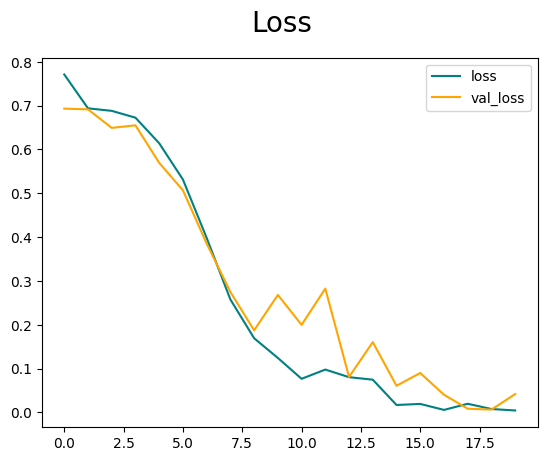

In [11]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper right")
plt.show()

In [5]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [13]:
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

1/1 [==============================] - 0s 31ms/step


In [14]:
print(f'Precision:{precision.result().numpy()}, Recall:{recall.result().numpy()}, Accuracy:{accuracy.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


In [2]:
import cv2

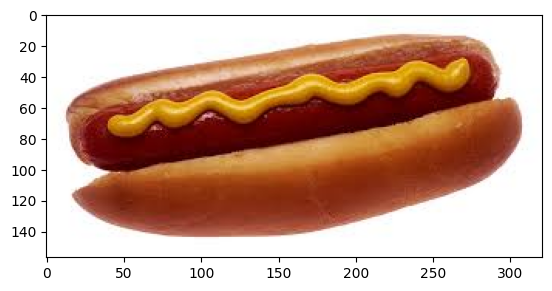

In [7]:
img = cv2.imread('new_test_data/hot_dog/1.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

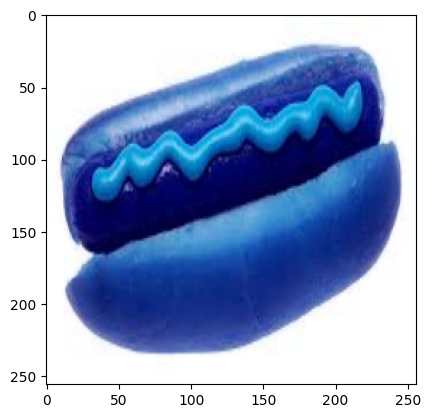

In [8]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [9]:
print(np.expand_dims(resize/255, 0))
yhat = model.predict(np.expand_dims(resize/255, 0))
print(yhat)

[[[[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  ...

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]]]


NameError: name 'model' is not defined

In [7]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(filepath=f"./models/deployModel/", save_format="tf")

In [26]:
model.save(os.path.join('models', 'seefoodmodel.h5'))

In [8]:
new_model = load_model(os.path.join('models', 'seefoodmodel.h5'))
new_model.predict(np.expand_dims(resize/255, 0))

NameError: name 'np' is not defined

In [10]:
from tensorflow import keras

In [12]:
# convert h5 to pb for tf serving
new_model.save(os.path.join('models', 'seefoodmodel.pb'), save_format='tf')

INFO:tensorflow:Assets written to: models\seefoodmodel.pb\assets


INFO:tensorflow:Assets written to: models\seefoodmodel.pb\assets
